In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
import seaborn as sns

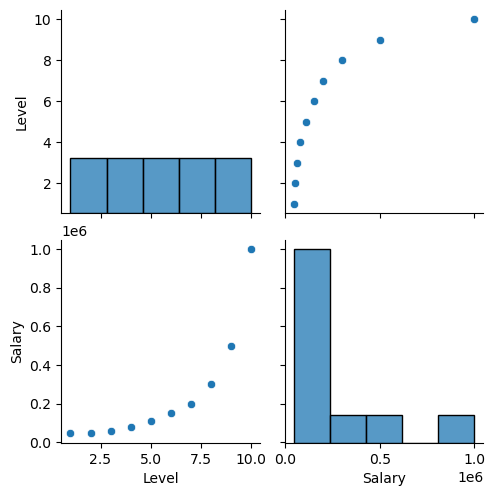

In [4]:
sns.pairplot(data)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#X_train,X_test,Y_train,Y_test=train_test_split(df['Level'],df['Salary'],test_size=0.2) eden ancin e vaka i dole da se pravi reshape
#X_train,X_test,Y_train,Y_test=train_test_split(data.iloc[:,1:2],data.iloc[:,2:3],test_size=0.2)
X = data.iloc[:,1:2].values
Y = data.iloc[:,2:3].values
X_train, X_test, Y_train, Y_test = train_test_split(
    data.iloc[:,1:2].values, data.iloc[:,2:3].values, test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
X_train

array([[ 8],
       [ 4],
       [ 9],
       [10],
       [ 3],
       [ 7],
       [ 2],
       [ 5]], dtype=int64)

In [10]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
Y_train=scaler.fit_transform(Y_train)
Y_test=scaler.fit_transform(Y_test)

### Polinomna regresija

In [12]:
from sklearn.preprocessing import PolynomialFeatures

#### 4 значи дека се користат карактеристики до степен 4. На пример, за влезна вредност 4 ке се создадат 1,x,x^1,x^2,x^3,x^4

In [14]:
poly_reg=PolynomialFeatures(4)

#### ако X_train = [[2], [3]], тогаш X_poly ќе биде: [[1,2,4,8,16],[1,3,9,27,81]]

In [16]:
X_poly=poly_reg.fit_transform(X_train)

In [17]:
X_poly

array([[ 1.        ,  0.73029674,  0.53333333,  0.3894916 ,  0.28444444],
       [ 1.        , -0.73029674,  0.53333333, -0.3894916 ,  0.28444444],
       [ 1.        ,  1.09544512,  1.2       ,  1.31453414,  1.44      ],
       [ 1.        ,  1.46059349,  2.13333333,  3.11593277,  4.55111111],
       [ 1.        , -1.09544512,  1.2       , -1.31453414,  1.44      ],
       [ 1.        ,  0.36514837,  0.13333333,  0.04868645,  0.01777778],
       [ 1.        , -1.46059349,  2.13333333, -3.11593277,  4.55111111],
       [ 1.        , -0.36514837,  0.13333333, -0.04868645,  0.01777778]])

#### Тука се „учат“ параметрите за трансформација на основа на X_poly и Y_train

In [19]:
poly_reg.fit(X_poly,Y_train) #visok cekor

PolynomialFeatures(degree=4)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()

#### моделот учи како да ја предвиди зависната променлива 𝑌 врз основа на полиноминалните карактеристики на 𝑋

In [23]:
model.fit(X_poly,Y_train)

LinearRegression()

In [24]:
X_test_poly=poly_reg.fit_transform(X_test)

#### Ги предвидува вредностите на Y (таргетот) за тест сетот врз основа на полиноминалните карактеристики X_test_poly

In [26]:
y_pred=model.predict(X_test_poly)

In [27]:
y_pred

array([[ 0.50044659],
       [-0.76558315]])

In [28]:
Y_test

array([[ 1.],
       [-1.]])

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mean_squared_error(Y_test,y_pred)

0.1522524334753463

In [31]:
#scaler=StandardScaler()
#Y_sc_train=scaler.fit_transform(Y_train)
#Y_sc_test=scaler.transform(Y_test)

In [32]:
train=[]
test=[]
for i in range(0,10):
   # poly=PolynomialFeatures(degree=i, )
   # X_poly=poly_reg.fit_transform(X_train)
    #X_test_poly=poly_reg.fit_transform(X_test)
    
  #  model=LinearRegression()
   # model.fit(X_poly,Y_train)
   # y_pred=model.predict(X_test_poly)
    #train.append(mean_squared_error(Y_sc_train,model.predict(X_poly)))
  #  test.append(mean_squared_error(Y_sc_test,y_pred))
    poly=PolynomialFeatures(degree=i, )
    X_poly=poly.fit_transform(X_train)
    l=LinearRegression()
    l.fit(X_poly,Y_train)
    
    X_test_poly =poly.fit_transform(X_test)
    y_pred=l.predict(X_test_poly)
    training_score=mean_squared_error (Y_train,l.predict(X_poly))
    test_score=mean_squared_error(Y_test,y_pred)
    train.append(training_score)
    test.append(test_score)

In [33]:
%matplotlib inline 
#графиците генерирани со matplotlib ќе се појават директно во Jupyter Notebook, наместо во посебен прозорец
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'MSEfro')

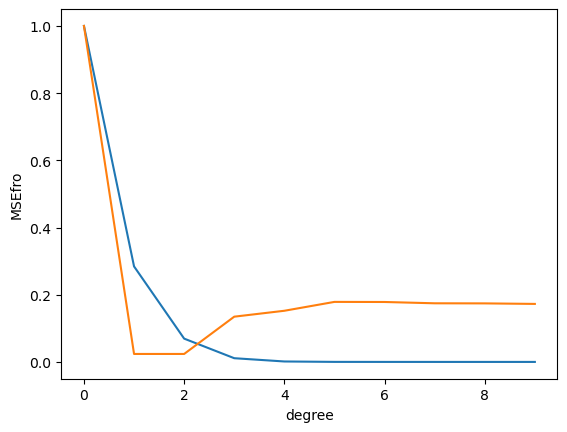

In [34]:
plt.plot(np.arange(10),train,label='Train')
plt.plot(np.arange(10),test,label='Test')
plt.xlabel('degree')
plt.ylabel('MSEfro')

### Ridge regularization & Cross Validation

In [36]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [37]:
model=KernelRidge(alpha=0.003,kernel='poly',degree=4,gamma=1,coef0=1)

In [38]:
cv=RepeatedKFold(n_splits=6,n_repeats=5,random_state=1)

In [39]:
scores=cross_val_score(model,X_train,Y_train,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

In [40]:
scores=np.absolute(scores)

In [41]:
scores

array([0.08123445, 0.31693688, 0.07067441, 0.10300896, 0.50124239,
       0.05492091, 0.41703747, 0.09149086, 0.01937041, 0.39737526,
       0.07067441, 0.05492091, 0.28198267, 0.0517393 , 0.10300896,
       0.14706105, 0.01937041, 0.39737526, 0.22676872, 0.04795956,
       0.14706105, 0.08777914, 0.50124239, 0.10300896, 0.22492641,
       0.24889252, 0.05492091, 0.01937041, 0.10300896, 0.14706105])

In [42]:
scores.mean()

0.1697141689168948

In [43]:
scores.std()

0.1445916539298326

In [44]:
model.fit(X_train,Y_train)

KernelRidge(alpha=0.003, degree=4, gamma=1, kernel='poly')

In [45]:
model.predict(X_test)

array([[ 0.50043671],
       [-0.76553386]])

In [46]:
Y_test

array([[ 1.],
       [-1.]])

### Desicion trees

In [48]:
data=pd.read_csv('bill_authentication.csv')
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


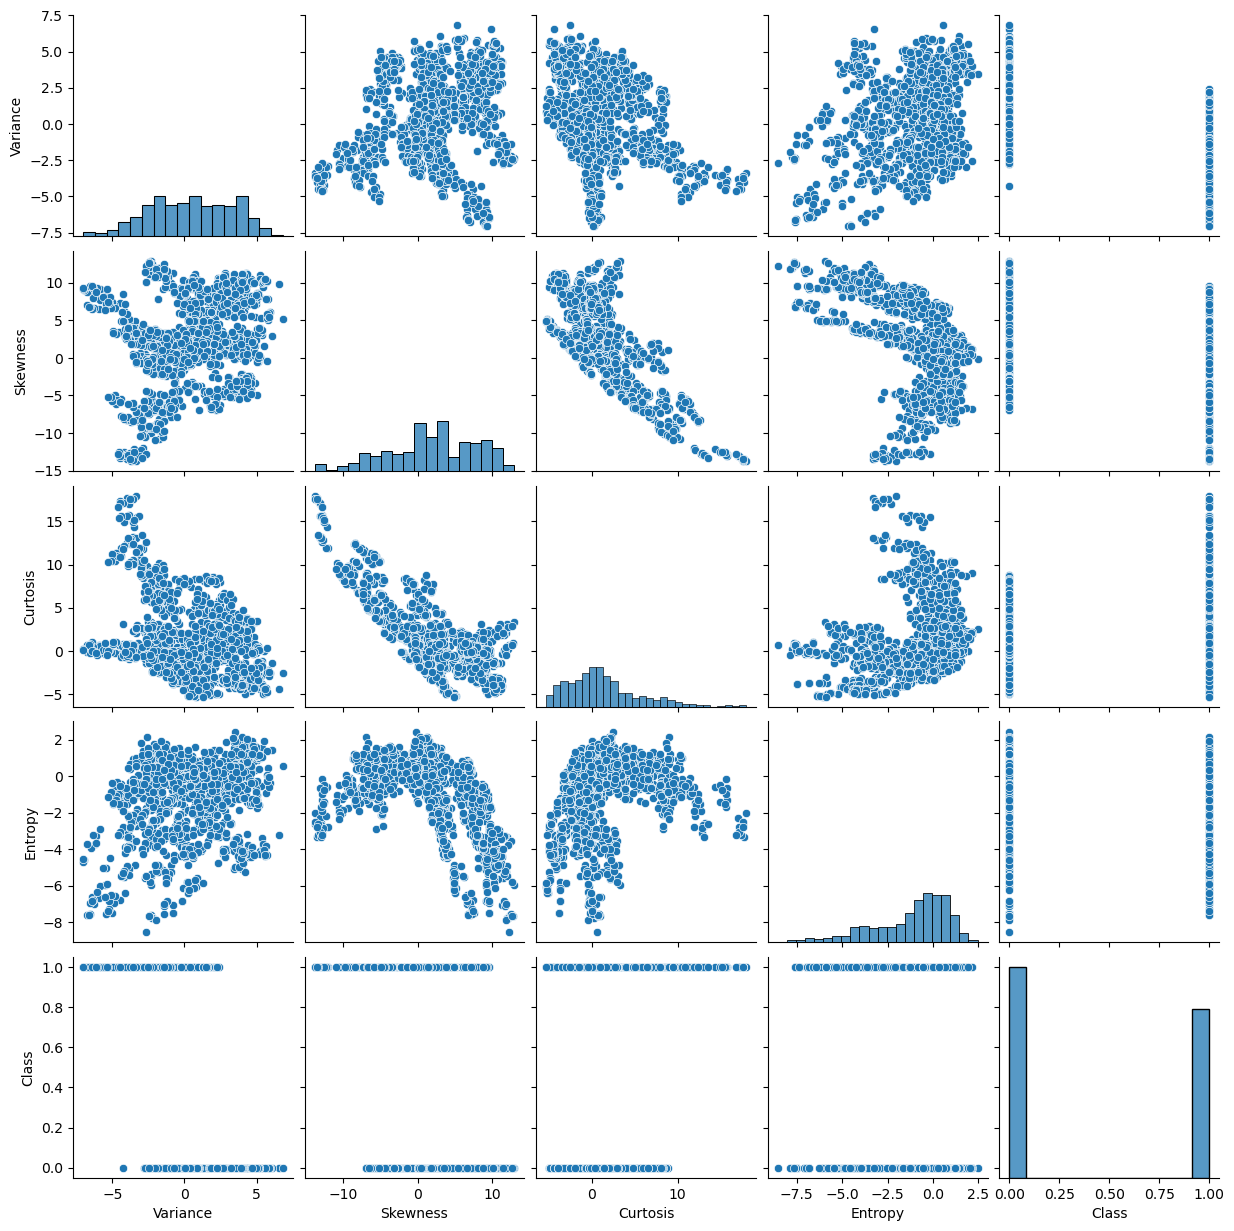

In [49]:
sns.pairplot(data)

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(data[data.columns[:-1]],data['Class'],test_size=0.2)

In [51]:
from sklearn.tree import DecisionTreeClassifier

###  Building Decision Tree Model

In [53]:
clf=DecisionTreeClassifier()

In [54]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [55]:
y_pred=clf.predict(X_test)

In [56]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9818181818181818


###  Evaluating Model

In [58]:
from sklearn.metrics import classification_report, confusion_matrix,f1_score

In [59]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
#f1_score(Y_test,y_pred)

[[150   2]
 [  3 120]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       152
           1       0.98      0.98      0.98       123

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [60]:
#y_pred=clf.predict(X_test)

In [61]:
#clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
#clf.fit(X_train,Y_train)

In [62]:
#print(f1_score(Y_test,y_pred))

###  Visualizing Decision Trees

In [64]:
!pip install graphviz 

In [65]:
 !pip install pydotplus

In [116]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [205]:
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=df.columns[:-1],class_names=['0','1'])

In [223]:
import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
if graph:
    display(Image(graph.create_png()))
else:
    print("Failed to create graph from DOT data.")



^
Expected {'GRAPH' | 'DIGRAPH'}  (at char 0), (line:1, col:1)
Failed to create graph from DOT data.
